In [217]:
import numpy as np
import matplotlib.pyplot as plt

In [218]:
def read_admissions_from_file():
    dataList = []
    
    with open("../db/admissions.csv") as f:
        for line in f:
           dataList.append(line.strip('\n').split(','))
    
    dataArray = np.asarray(dataList[0:30001])
    
    labels = dataArray[0]
    data = dataArray[1:]
            
    return data, labels

In [219]:
X_raw, labels_raw = read_admissions_from_file()

In [213]:
def convert_line(xraw, labels_raw):
    x_list = []        

    # age ----------------------------------------------------
    label = "age"
    j = np.where(labels_raw == label)[0][0]
    value = float(xraw[j]) if (xraw[j] != '') else -1
    print(value)
    if (value > 0) & (value < 200):
        x_list.append(value)
    else:
        return (None, 0)   

    # gender ------------------------------------------------
    label = "gender"
    j = np.where(labels_raw == label)[0][0]

    if xraw[j] == 'M':
        value = 1
    elif xraw[j] == 'F':
        value = -1
    else:
        value = 0        

    if value != 0:
        x_list.append(value)
    else:
        return (None, 1)
    
    # weight -------------------------------------------------
    label = "weight"
    j = np.where(labels_raw == label)[0][0]
    value = float(xraw[j]) if (xraw[j] != '') else -1

    if (value > 0) & (value < 200):
        x_list.append(value)
    else:
        return (None, 2)   

    # height -------------------------------------------------
    label = "height"
    j = np.where(labels_raw == label)[0][0]
    value = float(xraw[j]) if (xraw[j] != '') else -1

    if (value > 0) & (value < 300):
        x_list.append(value)
    else:
        return (None, 4)   

    """"""
    "meanbp_mean", "meanbp_min", "meanbp_max", "resprate_min", 
    "resprate_max", "resprate_mean", "tempc_mean", "glucose_min",
    "glucose_max", "glucose_mean"
    """"""
    for l in range(4, 14):
        label = label_list[l]
        j = np.where(labels_raw == label)[0][0]
        value = float(xraw[j]) if (xraw[j] != '') else -1

        if (value > 0):
            x_list.append(value) 
        else:
            return (None, l)
        
    return (np.asarray(x_list), -1)

In [214]:
def convert_types(X_raw, labels_raw):
    X_list = []
    label_list = ["age", 
                  "gender", 
                  "weight", 
                  "height", 
                  "meanbp_mean", "meanbp_min", "meanbp_max", "resprate_min", 
                  "resprate_max", "resprate_mean", "tempc_mean", "glucose_min",
                  "glucose_max", "glucose_mean"]
    loss = np.zeros((len(label_list), ))
        
    for i in range(X_raw.shape[0]):
        x, err = convert_line(X_raw[i], labels_raw)  
        
        if err < 0:
            X_list.append(x)
        else:
            loss[err] += 1
    
    print("Loss: ")
    for i, label in enumerate(label_list):
        print(f"{label}: {int(loss[i])}")
        
    return np.asarray(X_list), np.asarray(label_list)

In [215]:
X, labels = convert_types(X_raw, labels_raw)
X.shape

76.0


NameError: name 'label_list' is not defined

### Means berechnen:

In [184]:
def norm_mean(X, labels, label: str):
    i = np.where(labels == label)[0][0]
    mean = X[:, i].mean()
    X[:, i] = X[:, i] - mean
    
    return X, mean

In [185]:
means = []
for label in labels:
    X, mean = norm_mean(X, labels, label)
    means.append(mean)

### Plotten:

In [188]:
def plot_distribution(X, labels, label: str, mean):
    i = labels == label
    x = X[:, i]
    print(x[100:120])
    
    plt.figure(figsize=(12,4))
    plt.hist(x, bins=32, rwidth=1, alpha=1, label=label, density=True)
    plt.axvline(x= x.mean(), ls='--', c='r')
    plt.title(f"Distribution of {label}, $\mu$ = {mean:4.2f}", fontsize=20)
    plt.show()# "meanbp_mean", "meanbp_min", "meanbp_max", "resprate_min", "resprate_max", "resprate_mean"

[[  0.84545257]
 [ -1.15454743]
 [-30.15454743]
 [  0.84545257]
 [ 11.84545257]
 [  0.84545257]
 [  0.84545257]
 [ -6.15454743]
 [  0.84545257]
 [  5.84545257]
 [  9.84545257]
 [  9.84545257]
 [-11.15454743]
 [ 22.84545257]
 [ -4.15454743]
 [  8.84545257]
 [  6.84545257]
 [ 20.84545257]
 [ -6.15454743]
 [-17.15454743]]


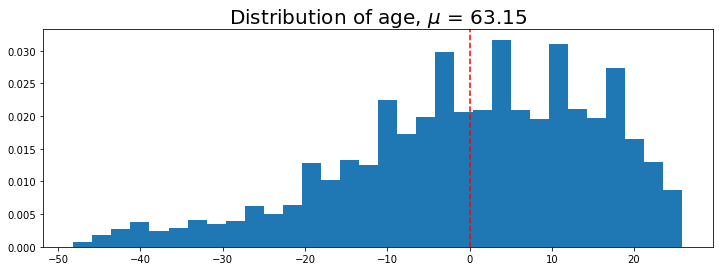

[[-1.23464293]
 [ 0.76535707]
 [-1.23464293]
 [ 0.76535707]
 [ 0.76535707]
 [ 0.76535707]
 [ 0.76535707]
 [-1.23464293]
 [ 0.76535707]
 [ 0.76535707]
 [-1.23464293]
 [ 0.76535707]
 [-1.23464293]
 [-1.23464293]
 [-1.23464293]
 [ 0.76535707]
 [ 0.76535707]
 [ 0.76535707]
 [-1.23464293]
 [ 0.76535707]]


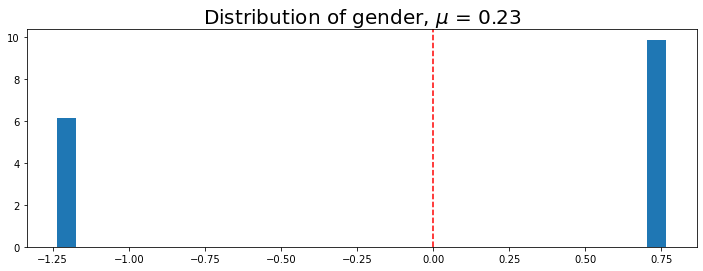

[[-18.11884089]
 [ 27.88115911]
 [ 17.88115911]
 [ -4.11884089]
 [  1.88115911]
 [  9.88115911]
 [  9.88115911]
 [-11.11884089]
 [ 11.88115911]
 [ -5.11884089]
 [-22.11884089]
 [ 17.88115911]
 [ 63.88115911]
 [-27.11884089]
 [  7.88115911]
 [ 60.88115911]
 [ -9.11884089]
 [ 12.88115911]
 [-20.11884089]
 [-18.11884089]]


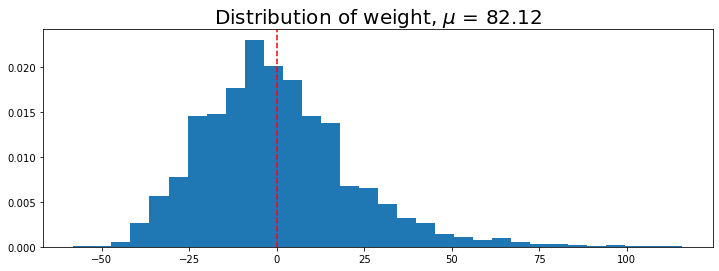

[[-17.83394834]
 [  5.16605166]
 [ -9.83394834]
 [ 13.16605166]
 [  8.16605166]
 [  8.16605166]
 [  8.16605166]
 [ -4.83394834]
 [  3.16605166]
 [  5.16605166]
 [ -9.83394834]
 [ 10.16605166]
 [-17.83394834]
 [ -6.83394834]
 [-12.83394834]
 [ 10.16605166]
 [  0.16605166]
 [-37.83394834]
 [-12.83394834]
 [ -1.83394834]]


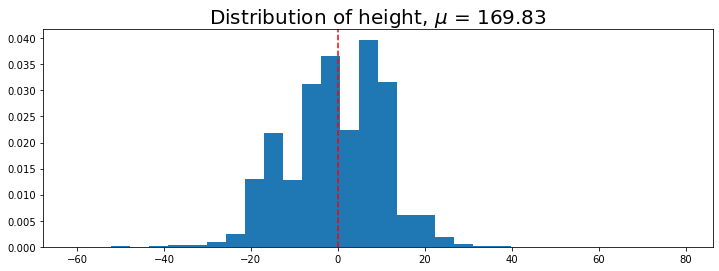

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


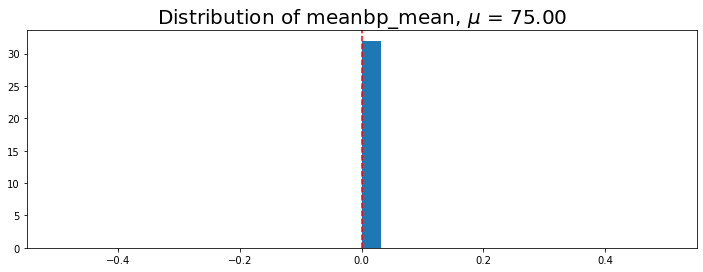

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


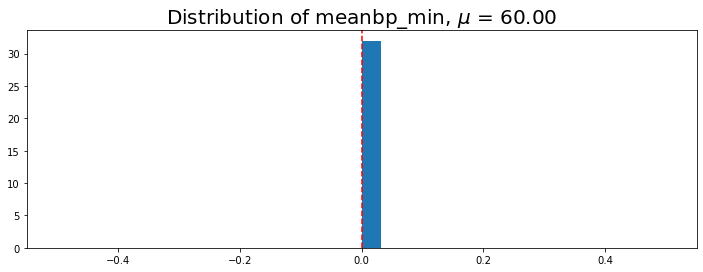

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


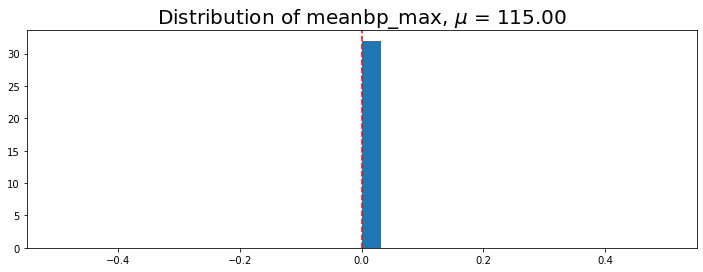

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


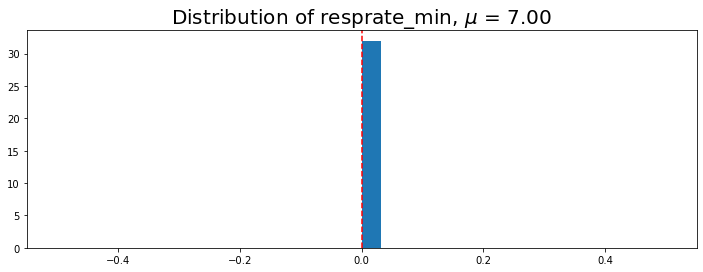

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


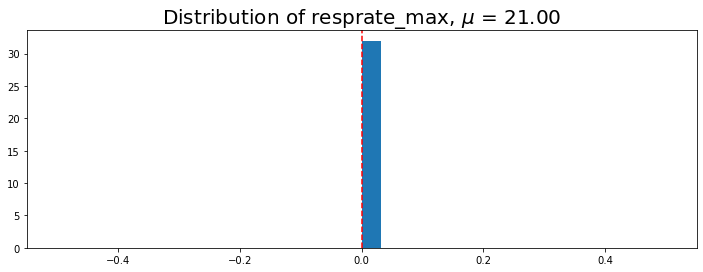

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


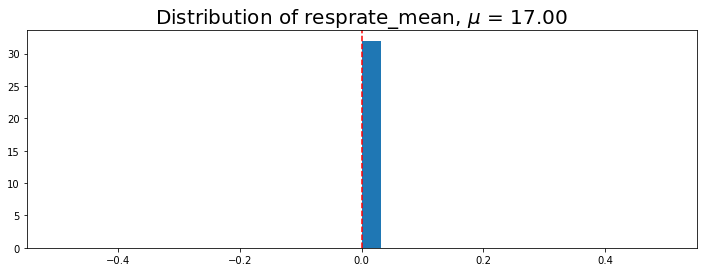

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


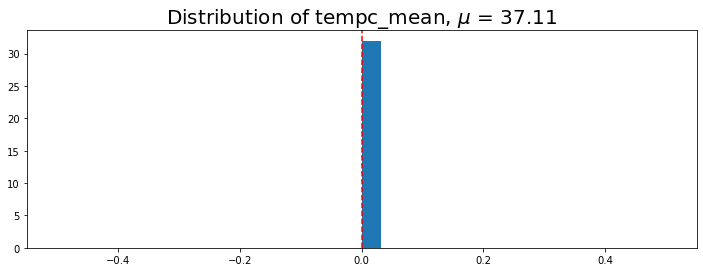

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


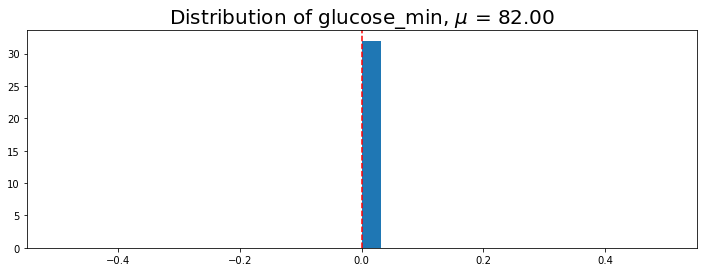

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


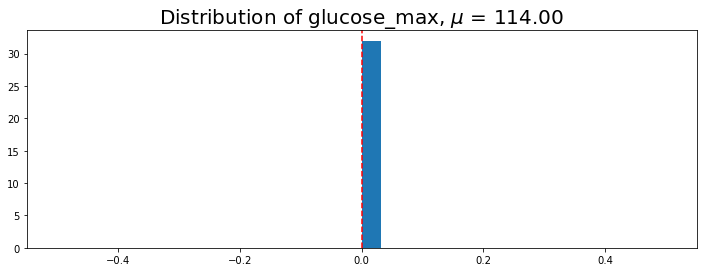

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


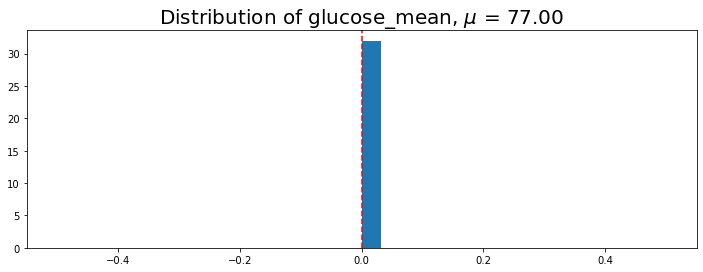

In [189]:
for i, label in enumerate(labels):
    plot_distribution(X, labels, label, means[i])

### Speichern:

In [181]:
with open('normalized_data.npy', 'wb') as f:
    np.save(f, X)
    
with open('means.npy', 'wb') as f:
    np.save(f,means)
    
with open('labels.npy', 'wb') as f:
    np.save(f,labels)

### Laden mit:

```python
with open('normalized_data.npy', 'rb') as f:
    X = np.load(f)
    
with open('means.npy', 'rb') as f:
    means = np.load(f)
    
with open('labels.npy', 'rb') as f:
    labels = np.load(f)
```